In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy import stats

In [4]:
sample = stats.norm(100,20).rvs(10)

In [5]:
sample

array([112.95075862, 120.39701176, 108.92540544, 128.05994432,
       127.28246076,  73.50088577,  99.1351351 ,  85.30643494,
        96.52088748, 110.32862208])

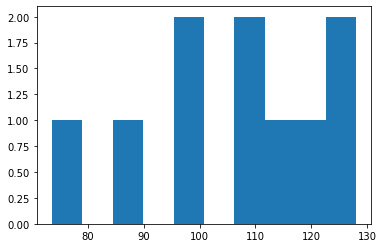

In [6]:
plt.hist(sample);

In [8]:
def gauss_form(x,mu,sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))/np.sqrt(2*math.pi)*sig

In [14]:
gauss_form(112.95075862,300,20)*gauss_form(120.39701176,300,20)*gauss_form(108.92,300,20)

2.398163259376294e-54

In [15]:
np.log(3*4)

2.4849066497880004

In [16]:
np.log(3)+np.log(4)

2.4849066497880004

In [17]:
def log_likelihood_individual(x, mu, sig):
    """"""
    #Do not use Math
    return np.log(np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))-np.log( np.sqrt(2*math.pi)*sig  )

In [18]:
def sum_logs(mu,sig,sample):
    logs = []
    for x in sample:
        logs.append(log_likelihood_individual(x,mu,sig))
    return sum(logs)

In [19]:
from scipy.optimize import minimize

In [28]:
def maximize(sample):
    def negative_ll(params):
        return -sum_logs(*params,sample=sample)
    params0=np.array([300,20])
    res = minimize(negative_ll,params0,method="nelder-mead")
    return res

In [29]:
maximize(sample).x

array([106.2407244 ,  16.86198668])

In [30]:
sample.mean()

106.24075462905796

In [31]:
sample.std()

16.86203610145124